# Convolutional Neural Networks (CNNs)

...history, MLP for images, idea of locality...

Widely used in modern computer vision tasks:
1. Classification
2. Localization
3. Segmentation
4. Instance segmentation

But not only:
1. CNNs for sentence classification
2. RCNNs for speech recognition
3. ...

### ImageNet accuracy evolution
<img src="https://chaosmail.github.io/images/deep-learning/top1.png">

### CNNs for image classification

Typical CNN architecture consists of following ingredients:

1. 2D convolution layers
2. Pooling layers (MaxPooling, AveragePooling)
3. Some dense layers (maybe)
4. BatchNorm / Dropout and etc.

Typical CNN architecture (VGG-19 network) looks like:
<img src="https://www.cs.toronto.edu/~frossard/post/vgg16/vgg16.png">
<img src="http://blog.christianperone.com/wp-content/uploads/2016/01/vgg16arch.png">

# Convolution

1-D convolution:
$$(f * g)(t)=\int_{-\infty}^{\infty}{f(\tau)g(t-\tau)d\tau}=\int_{-\infty}^{\infty}{f(t-\tau)g(\tau)d\tau}$$

Discrete 1-D convolution with finite support:
$$(f * g)(t)=\sum_{m=-M}^{M}{f(t-m)g(m)}=\sum_{m=-M}^{M}{f_{t-m}g_{m}}$$

2-D convolution:
$$(f * g)(x, y)=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}{f(\tau_1,\tau_2)g(x-\tau_1,y-\tau_2)d\tau_1d\tau_2}$$

Discrete 2-D convolution with finite support:
$$(f * g)(x,y)=\sum_{m=-M_1}^{M_1}\sum_{n=-N_1}^{N_1}{f(m,n)g(x-m,y-n)}$$

### 2D convolution visualization

Convolution of image and some filter looks like:
<img src="http://colah.github.io/posts/2014-07-Understanding-Convolutions/img/RiverTrain-ImageConvDiagram.png">

Or, with some numbers provided:
<img src="https://docs.gimp.org/en/images/filters/examples/convolution-calculate.png">

Finally, animation:
<img src="https://ujwlkarn.files.wordpress.com/2016/07/convolution_schematic.gif">

Examples of human-created filters:
1. <b>Blur filter</b>
<img src="https://docs.gimp.org/en/images/filters/examples/convolution-blur.png">
<img src="https://docs.gimp.org/en/images/filters/examples/generic-taj-convmatrix-blur.jpg">
2. <b>Edge detector filter</b>
<img src="https://docs.gimp.org/en/images/filters/examples/convolution-edge-detect1.png">
<img src="https://docs.gimp.org/en/images/filters/examples/generic-taj-convmatrix-edge-detect.jpg">
3. <b>And many others in computer vision</b>

### The key idea of CNNs is to learn such filters (their weights) directly from data
1. Every convolution layer has a <b>bunch of filters</b> of predefined shape (look to example)
2. All filters initialized randomly (as usual) 
3. We can calculate gradient with respect of filters params (not so easy, but we can)
4. As the result, we'll learn filters from training set

<b>Example</b>:  
Suppose image of shape 224x224x<b>3</b> (height x width x colors = channels).  
Then our first convolution layer may have shape of 64x5x5x<b>3</b> (filters count x filter height x filter width x previous layer channels).  
And second convolution layer may have shape of 16x3x3x<b>64</b> (filters count x filter height x filter width x previous layer channels).

So, the <b>last dimension is always = number of channels in previous layer</b>.

### But in practice we also have two additional problems:
1. Specify the <b>stride</b> of convolution  
Do we always need to make a discrete step of one in spatial dimensions (step is called <b>stride</b>)?

2. Use <b>padding</b> for filters or not  
If we'll convolve 7x7x1 image with 3x3x1 filter we'll have 5x5x1 feature map (7x7 --> 5x5). In the result shape is <b>collapsing</b> rather rapidly and we can not build any deep architecture.

The solution is to use padding (which depends on the shape of filters):
<img src="https://upload.wikimedia.org/wikipedia/commons/4/4f/3D_Convolution_Animation.gif">

### Convolution and backpropagation

We can efficiently (in computation terms) implement 2D convolution as matrix-matrix multiplication (im2col, col2im).  
<b>There is no free cheese - posssible huge memory consumption.</b>

Suppose we have 7 x 7 x 1 tensor (7x7 matrix) $X$:
$$X = \begin{bmatrix}
    x_{11} & x_{12} & x_{13} & x_{14} & \dots & x_{17} \\
    x_{21} & x_{22} & x_{23} & x_{24} & \dots & x_{27} \\
    x_{31} & x_{32} & x_{33} & x_{34} & \dots & x_{37} \\
    \dots & \dots & \dots & \dots & \dots & \dots \\
    x_{71} & x_{72} & x_{73} &x_{74} & \dots & x_{77}
\end{bmatrix}$$

And also we have 3 x 3 x 2 tensor of filters (or 3x3 matrices $W^{1}$ and $W^{2}$):

$$W^{1} = \begin{bmatrix}
    w^{1}_{11} & w^{1}_{12} & w^{1}_{13} \\
    w^{1}_{21} & w^{1}_{22} & w^{1}_{23} \\
    w^{1}_{31} & w^{1}_{32} & w^{1}_{33}
\end{bmatrix}$$

$$W^{2} = \begin{bmatrix}
    w^{2}_{11} & w^{2}_{12} & w^{2}_{13} \\
    w^{2}_{21} & w^{2}_{22} & w^{2}_{23} \\
    w^{2}_{31} & w^{2}_{32} & w^{2}_{33}
\end{bmatrix}$$

We can rewrite convolution of $X$ with filters $W=\{W^{1}, W^{2}\}$ as matrix-matrix multiplication:

$$
\bar{Z}_1 = \bar{X} \bar{W} = 
\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & x_{21} & x_{22} & x_{23} & x_{31} & x_{32} & x_{33}  \\
    x_{12} & x_{13} & x_{14} & x_{22} & x_{23} & x_{24} & x_{32} & x_{33} & x_{34}  \\
    x_{13} & x_{14} & x_{15} & x_{23} & x_{24} & x_{25} & x_{33} & x_{34} & x_{35}  \\
    \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots \\
    x_{55} & x_{56} & x_{57} & x_{65} & x_{66} & x_{67} & x_{75} & x_{76} & x_{77}
\end{bmatrix}
*
\begin{bmatrix}
    w^{1}_{11} & w^{2}_{11} \\
    w^{1}_{12} & w^{2}_{12} \\
    w^{1}_{13} & w^{2}_{13} \\
    w^{1}_{21} & w^{2}_{21} \\
    w^{1}_{22} & w^{2}_{22} \\
    w^{1}_{23} & w^{2}_{23} \\
    w^{1}_{31} & w^{2}_{31} \\
    w^{1}_{32} & w^{2}_{32} \\
    w^{1}_{33} & w^{2}_{33}
\end{bmatrix}
$$

and then reshape to appropriate form.

Let's construct the simpliest CNN for regression:

$$f(x)=W_2 flatten(W_1 \ast x + b_1)+b_2$$
where "$\ast$" is 2D discrete convolution.

As we describe convolution as matrix-matrix multiplication we can use <b>the same form of backpropagation</b> algorithm:

$$\frac{\partial{L}}{\partial{W_2}} = \frac{1}{N}\sum_{(x_j, y_j)}{(a_2(x_j)-y_j)*a_1(x_j)}$$
$$\frac{\partial{L}}{\partial{W_1}} = \frac{1}{N}\sum_{(x_j, y_j)}{(a_2(x_j)-y_j)*W_2*f'_1(\bar{Z}_1)*\bar{X}}$$

And then carefully change dimensions.

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
import numpy as np

def relu(z):
    return np.maximum(0, z)

def drelu(z):
    x = z.copy()
    x[x < 0] = 0

    return x

def convolve2d_forward(input_tensor, filter_tensor, biases):
    h, w, channels_num = input_tensor.shape
    q, p, _, filters_num = filter_tensor.shape

    h_out, w_out = h - q + 1, w - p + 1
    W = filter_tensor.reshape(filters_num, -1)

    X = []
    for i in range(h - q + 1):
        for j in range(w - p + 1):
            receptive_field = input_tensor[i:(i+p), j:(j+q), :].reshape(-1)
            X.append(receptive_field)

    X_reshaped = np.array(X, dtype=np.float32)
    
    # Numpy broadcasting works here
    out = np.dot(X_reshaped, W.T) + biases
    out = out.reshape(h_out, w_out, filters_num)

    return out, X_reshaped

def forward_pass():
    Z1, X_col = convolve2d_forward(X, W1, b1)
    
    A1 = relu(Z1)
    A1_flatten = A1.flatten()
    
    A2 = np.dot(W2, A1_flatten) + b2
    
    return {'Z1': Z1, 'A1': A1, 'A2': A2, 'X_col': X_col}

def backward_pass(fwd):
    dL_da2 = (fwd['A2'] - Y)
    delta_2 = dL_da2
    
    dL_db2 = np.sum(delta_2)
    dL_dW2 = fwd['A1'].flatten() * dL_da2
    assert dL_dW2.shape == W2.shape
    
    Z1 = fwd['Z1']
    delta_1 = delta_2 * W2.reshape(Z1.shape) * drelu(Z1)
    dL_db1 = np.sum(delta_1)
    
    N, M, C = delta_1.shape
    dL_dW1 = np.dot(fwd['X_col'].T, delta_1.reshape(N * M, C))
    dL_dW1 = dL_dW1.reshape(W1.shape)
    assert dL_dW1.shape == W1.shape

    return {'dW2': dL_dW2, 'db2': dL_db2, 'dW1': dL_dW1, 'db1': dL_db1}

In [92]:
filters_num = 2

X = np.random.randn(7, 7, 3)
Y = 5

W1 = 0.05 * np.random.randn(3, 3, 3, filters_num)
b1 = 0.01 * np.ones(shape=filters_num)

W2 = 0.05 * np.random.randn(5 * 5 * filters_num)
b2 = 0.01

In [93]:
num_iter = 20
learning_rate = 0.01

for i in range(num_iter):
    forward_cache = forward_pass()
    print((Y - forward_cache['A2'])**2)
    
    gradients = backward_pass(forward_cache)
    
    W1 -= learning_rate * gradients['dW1']
    b1 -= learning_rate * gradients['db1']
    
    W2 -= learning_rate * gradients['dW2']
    b2 -= learning_rate * gradients['db2']

print('Predicted value: %s' % forward_cache['A2'])

24.833745021
23.5608116346
22.3667016556
21.1947892953
19.9857302224
18.6261840479
17.0982253279
15.3034804918
13.1404833442
10.511585915
7.57390614058
4.64194647994
2.2380875482
0.777468891413
0.184760162317
0.0311578434725
0.00420299701812
0.000509901805082
5.93384701655e-05
6.80347298917e-06
Predicted value: 4.99739165321


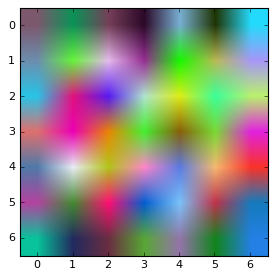

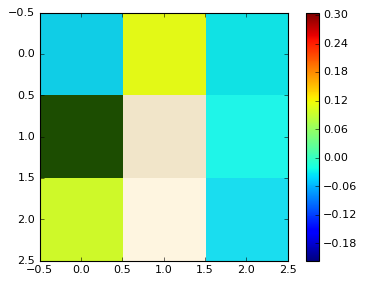

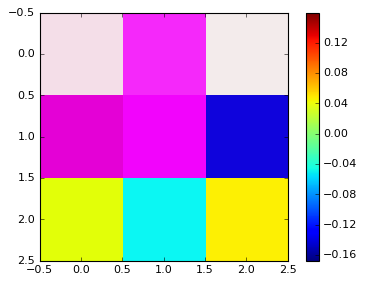

In [94]:
plt.imshow(X)
plt.show()

for filter_num in range(W1.shape[3]): 
    plt.imshow(W1[:, :, :, filter_num], interpolation='nearest')
    plt.colorbar()
    plt.show()

<b>In real life each convolution layer adding complexity of representation.</b>

We can visualise first layer of pretrained network (AlexNet) and look on filters (which works directly with image pixels):
<img src="http://cs231n.github.io/assets/cnnvis/filt1.jpeg">

Deeper layers works with activations of previous and it is not so easy to figure out how they combine information of previous layers, but some techniques exists.

### Alternative way: DFT

Discrete Fourier Transform looks like:
$$X_k=\sum_{n=0}^{N-1}{x_n e^{-2\pi ikn/N}}$$
$$k \in Z$$

And has a nice property called <b>convolution theorem</b>:
$$F\{f*g\}=F\{f\} F\{g\}$$
$$f*g=F^{-1}\{F\{f\} F\{g\}\}$$

So, we can calculate convolution of image and filters in three steps:
1. Apply fourier transform to image and filters
2. Apply elementwise multiplication
3. Apply inverse fourier transform

In practice, it has benefits for <b>wide filters</b> (7x7 and greater) and <b>FFT</b> (Fast Fourier Transform).

In [95]:
# TODO: add implementation

# Receptive field of convolution filter

Interesting question is to use wide filter (for example, 7x7) or a narrower one (3x3)?  
In general, the answer for images is - <b>use a couple of narrower instead of a single wide filter</b>.

<img src="http://blog.cvmarcher.com/posts/2015/05/17/cnn-trick/receptive_field.jpg">

### For 3x3 convolution:
<img src="https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/image_folder_3/CascadingConvolutions.png">

### Exception example: Spectrograms
Spectrogram is an "image" generated from audio signal with WDFT technique (or some others).

<img src="https://www.researchgate.net/profile/Corrado_Cescon/publication/234140875/figure/fig3/AS:196016939769859@1423745488412/Raw-audio-signal-above-detected-during-a-C1-2-HVLA-thrust-manipulation-and-the.png">

<b>In such tasks you possibly need to use rectangular filters (wider in frequency domain).</b>

# Pooling

1. Pooling layer downsamples the volume spatially
2. <b>Hasn't any learnable parameters</b>
3. You can implement pooling with different math operations: min, max, average and etc.
4. Two main characteristics of pooling are <b>shape</b> and <b>stride</b>
5. Some people don't like pooling operations and decide to use only convolutional layers with bigger stride (shown, that it is critical in some architectures like GANs).

### Downsampling
<img src="http://cs231n.github.io/assets/cnn/pool.jpeg">

### Max pooling:
<img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg">

### Average pooling:
1. Average pooling was often used historically
2. Nowadays <b>max pooling operation is prefered</b> cause it has been shown to work better in practice

In [96]:
# TODO: implement backprop for max pooling

# Common architectures: VGG16 / VGG19
Classical CNN architecture nowadays.
<img src="http://html.scirp.org/file/4-7800353x6.png">

### Memory consumption analysis:
<img src="http://nmhkahn.github.io/assets/Casestudy-CNN/vgg-arch3.png">

<b>Main memory issues:</b>
1. Bottleneck "CONV3_512 -> FC1" ~ 100M paramaters
2. Stride = 1 in first convolutions - 3.2Mb memory for 224x224x3 image

# Common architectures: Inception v3

1. Much more complex architecture
2. Uses a lot of interesting tricks to reduce amount of parameters and increase nonlinearity of model
3. Consists not simply of "convolutional-pooling" blocks (layers) but of complex "Inception blocks"
<img src="https://raw.githubusercontent.com/iamaaditya/iamaaditya.github.io/master/images/inception_1x1.png">

# Modern architectures tricks
1. Factorize 3x3 convolution as 3x1 convolution + 1x3 convolution (9 weights -> 6 weights + more nonlinearity)
2. 1x1 convolutions is like weighted averaging of filters activations 
3. Global averagre pooling layer instead of flatten + dense layer (spatially average 8x8x128 filter activation to 1x1x128)
4. Use BatchNormalization for better gradients flow

# Finetuning
1. Finetuning of networks is the process when you use knowledge derived from solving similar tasks to solve a new one
2. In context of CNNs that means "<b>initialize the part of your filters with filters of other model (trained on ImageNet for example)</b>"
3. First convolutions always learns filters like "lines" and "color blobs", futher layers can recognize more complex structures
4. <b>Be careful with learning rate if work with pretrained layers</b>

There are 3 main strategies:
1. Use pretrained network as feature extractor (extract features with VGG19 and build classifier on top of them)
2. Continue to train last few layers to fit your data better
3. Continue to train the whole network

The decision depend on <b>amount of data</b> and <b>content of your data</b>.

# Example: Tuning VGG16

In [117]:
import h5py

import keras
import keras.backend as K

# For sequential kind of thinking (layers)
from keras.models import Sequential
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Flatten

# For graph kind of thinking (blocks)
from keras.models import Model
from keras.layers import merge

In [118]:
def initialize_vgg_layers(model):
    with h5py.File(VGG_WEIGHTS, 'r') as f:
        for layer_name, layer_group in f.items():
            if len(layer_group) != 0:
                W = layer_group[layer_name + '_W_1:0']
                b = layer_group[layer_name + '_b_1:0']
                
                layer = model.get_layer(layer_name)
                if layer is not None:
                    print('Setting up weights for layer %s' % layer_name)
                    layer.set_weights([W, b])

    
def truncated_vgg_encoder(input_shape, convs_1x1, dense_size):
    encoder = Sequential()
    # Block 1
    encoder.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block1_conv1', trainable=False, input_shape=input_shape))
    encoder.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block1_conv2', trainable=False))
    encoder.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

    # Block 2
    encoder.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same', name='block2_conv1', trainable=False))
    encoder.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same', name='block2_conv2', trainable=False))
    encoder.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

    # Block 3
    encoder.add(Convolution2D(256, 3, 3, activation='relu', border_mode='same', name='block3_conv1', trainable=False))
    encoder.add(Convolution2D(256, 3, 3, activation='relu', border_mode='same', name='block3_conv2', trainable=False))
    encoder.add(Convolution2D(256, 3, 3, activation='relu', border_mode='same', name='block3_conv3', trainable=False))
    encoder.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

    # Block 4
    encoder.add(Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block4_conv1', trainable=False))
    encoder.add(Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block4_conv2', trainable=False))
    encoder.add(Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block4_conv3', trainable=False))
    encoder.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

    # Block 5
    encoder.add(Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block5_conv1', trainable=True))
    encoder.add(Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block5_conv2', trainable=True))
    encoder.add(Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='block5_conv3', trainable=True))
    encoder.add(MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))
    
    # Filters bottleneck
    encoder.add(Convolution2D(convs_1x1, 1, 1, activation='relu', name='convs_1x1'))
    encoder.add(Flatten(name='flatten'))
    
    encoder.add(Dense(dense_size, activation='relu', name='encoder_fc'))
    
    # Initialize pretrained VGG layers
    # initialize_vgg_layers(encoder)
    
    return encoder


def build_model(image_shape, convs_1x1, encoder_dense_size, classifier_dense_size):
    first_image_input = Input(shape=image_shape, name='first_image_input')
    second_image_input = Input(shape=image_shape, name='second_image_input')
    
    image_encoder = truncated_vgg_encoder(image_shape, convs_1x1, encoder_dense_size)
    
    first_image_vector = image_encoder(first_image_input)
    second_image_vector = image_encoder(second_image_input)
    
    merged_vectors = merge([first_image_vector, second_image_vector], mode='concat')
    
    dense_layer = Dense(classifier_dense_size, activation='relu')(merged_vectors)
    dense_layer = Dense(classifier_dense_size, activation='relu')(dense_layer)

    output_proba = Dense(1, activation='sigmoid')(dense_layer)
    
    model = Model(
        input=[first_image_input, second_image_input],
        output=output_proba
    )
    
    return model

In [120]:
convs_1x1 = 128
encoder_dense_size = 256
classifier_dense_size = 512

img_width, img_height = 112, 92

if K.image_dim_ordering() == 'th':
    image_shape = (3, img_width, img_height)
else:
    image_shape = (img_width, img_height, 3)
    
learning_rate = 0.001
batch_size = 20

model = build_model(image_shape, convs_1x1, encoder_dense_size, classifier_dense_size)